# Notebook 3: Test hybrid origin of Eriosyce chilensis

In [1]:
import ipyrad.analysis as ipa
import pandas as pd
import toytree
import toyplot
import toyplot.pdf, toyplot.svg

### DATA FILES

In [2]:
SNPS = "../assembly/Eriosyce-ref-2021_outfiles/Eriosyce-ref-2021.snps.hdf5"

# get names from the database
info = ipa.snps_extracter(SNPS)

### Sample metadata

In [3]:
df = pd.read_csv("../metadata/pablo-cacti-relabeled-re.csv")
df.head()

accession     Genus      specie subspecie                Localidad     Lat  \
0      1075  Eriosyce   litoralis       NaN           TotoralilloIVR -30.068   
1      1083  Eriosyce   litoralis       NaN           TotoralilloIVR -30.069   
2      1093  Eriosyce     clavata       NaN             Qda.Manqueza -29.914   
3      1288  Eriosyce  subgibbosa       NaN  PeninsuladeHualpenVIIIR -36.757   
4      1290  Eriosyce  subgibbosa       NaN  PeninsuladeHualpenVIIIR -36.757   

     Long     oldname  
0 -71.375   litoralis  
1 -71.376   litoralis  
2 -70.943     clavata  
3 -73.176  subgibbosa  
4 -73.176  subgibbosa

### Subselect samples 
Only include those from the ingroup clades in the phylogeny.

In [4]:
DROP = [
    # non-focal taxa and poor quality samples
    '1530',
    '1530x',
    'BV85',
    '1093',
    '1332',
    '1333',
    'BV185',
    'BV152',
    '1288',
    '1290',
    'reference',
    '1351',
    '1352',
    '1353',
    '1541',
    '1594',
    
    # hand-made hybrids
    'HPG1',
    'HPG2',
    'HPG4',
    'SXM1',
    'SXM2',
    'SXM3',
    
    # horridocactus clade relatives
    '9366',
    '1488',
    'HV54',
    'HV55',
    'BV190',
    'BV113',
    
    # chilensis that has distant introgressed ancestry
    '1596',
    '1597',
    
    # litoralis that has distance introgressed ancestry
    '1075',
    '1083',
]
len(DROP)

32

In [7]:
# select all samples not in the drop list
IMAP = {'keep': [i for i in df.accession.tolist() if i not in DROP]}

In [8]:
# filter data for this group
tool = ipa.pca(data=SNPS, imap=IMAP, mincov=0.9, impute_method="sample")

Samples: 66
Sites before filtering: 1665488
Filtered (indels): 0
Filtered (bi-allel): 96876
Filtered (mincov): 1618251
Filtered (minmap): 23874
Filtered (subsample invariant): 542782
Filtered (minor allele frequency): 0
Filtered (combined): 1668829
Sites after filtering: 26944
Sites containing missing values: 20573 (76.35%)
Missing values in SNP matrix: 68135 (3.83%)
SNPs (total): 26944
SNPs (unlinked): 2904
Imputation: 'sampled'; (0, 1, 2) = 82.5%, 7.5%, 10.0%


In [9]:
tool.run(25)

Subsampling SNPs: 2904/26944


In [12]:
tool.draw(0, 1);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="400.0px" height="300.0px" viewBox="0 0 400.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t760e7c419bf94cfeb224c588d71c662b"> <g style="fill:rgb(36.9%,31%,63.5%);fill-opacity:0.036000000

<div class="alert alert-info">
    When outgroups, poor samples, and hybrids are removed, the three main clades clearly separate in PC space over the first two axes, with mutabilis vs not on PC0, and litoralis vs. chilensis on PC1.
</div>

### Draw colored groups

In [13]:
GMAP = {"chilensis-albidiflora": [], "chilensis": [], "mutabilis": [], "litoralis": []}
for name, group in df.groupby('specie'):
    if name in GMAP:
        for i in group.accession:
            if i in IMAP['keep']:
                GMAP[name].append(i)

In [14]:
COLORS = [
    toytree.darkcolors[5],
    toytree.darkcolors[0],
    toytree.darkcolors[1],
    toytree.darkcolors[2],
]

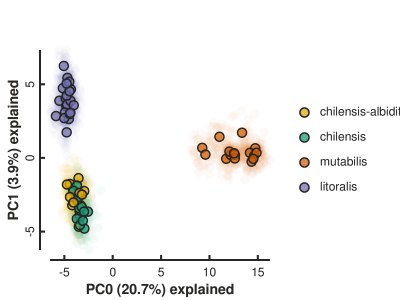

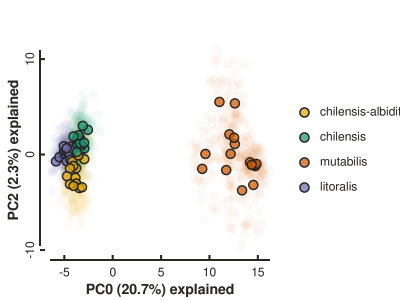

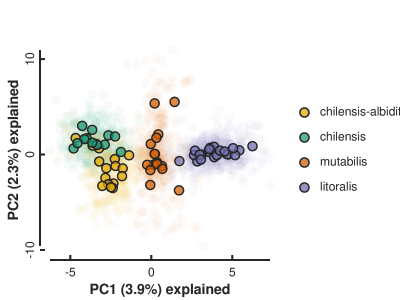

In [15]:
for pair in [(0, 1), (0, 2), (1, 2)]:

    canvas, axes = tool.draw(pair[0], pair[1], imap=GMAP, colors=COLORS, size=9);
    axes.x.ticks.show = True
    axes.y.ticks.show = True
    axes.x.ticks.style['stroke-width'] = 2
    axes.y.ticks.style['stroke-width'] = 2
    #toyplot.html.render(canvas, "../figures/PCA-sub-{}{}.html".format(*pair))
    #toyplot.svg.render(canvas, "../figures/PCA-sub-{}{}.svg".format(*pair))
    #toyplot.pdf.render(canvas, "../figures/PCA-sub-{}{}.pdf".format(*pair))
    display(canvas)

### INCLUDE HYBRIDS

In [292]:
# samples excluded from last round
others = [
    'HPG1',
    'HPG2',
    'HPG4',
    'SXM1',
    'SXM2',
    #'SXM3',  # low data
    '9366',
    '1488',
    'HV54',
    'HV55',
    #'BV190', # outgroups
    #'BV113', # outgroups
    '1596',
    '1597',
    '1075',
    '1083',
]

# include all samples in PCA
IMAP2 = IMAP.copy()
IMAP2['keep'].extend(others)

# group samples for plotting colors
HMAP = GMAP.copy()
HMAP['hybrids'] = [
    '1596',
    '1597',  
    '1075',
    '1083',
    'HPG1',
    'HPG2',
    'HPG4',
    'SXM1',
    'SXM2',
]
HMAP['horrido'] = [
    '9366',
    '1488',
    'HV54',
    'HV55',
]

In [293]:
tool2 = ipa.pca(data=SNPS, imap=IMAP2, mincov=0.9, impute_method="sample")

Samples: 79
Sites before filtering: 1665488
Filtered (indels): 0
Filtered (bi-allel): 119102
Filtered (mincov): 1622200
Filtered (minmap): 4068
Filtered (subsample invariant): 275712
Filtered (minor allele frequency): 0
Filtered (combined): 1693972
Sites after filtering: 30161
Sites containing missing values: 23387 (77.54%)
Missing values in SNP matrix: 87300 (3.66%)
SNPs (total): 30161
SNPs (unlinked): 2686
Imputation: 'sampled'; (0, 1, 2) = 84.6%, 6.2%, 9.2%


In [294]:
tool2.run(25)

Subsampling SNPs: 2686/30161


In [317]:
COLORS2 = [
    toytree.darkcolors[5],
    toytree.darkcolors[0],
    toytree.darkcolors[1],
    toytree.darkcolors[2],
    toytree.darkcolors[3],
    toytree.darkcolors[7],
]

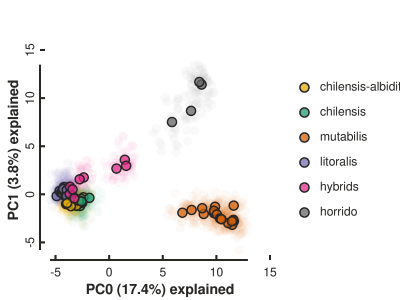

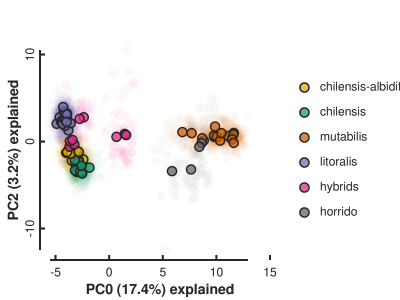

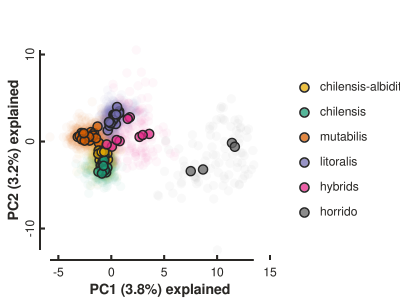

In [331]:
for pair in [(0, 1), (0, 2), (1, 2)]:

    canvas, axes = tool2.draw(pair[0], pair[1], imap=HMAP, colors=COLORS2, size=9);
    axes.x.ticks.show = True
    axes.y.ticks.show = True
    axes.x.ticks.style['stroke-width'] = 2
    axes.y.ticks.style['stroke-width'] = 2
    toyplot.html.render(canvas, "../figures/PCA-full-{}{}.html".format(*pair))
    toyplot.svg.render(canvas, "../figures/PCA-full-{}{}.svg".format(*pair))
    toyplot.pdf.render(canvas, "../figures/PCA-full-{}{}.pdf".format(*pair))
    display(canvas)

### include HYBRIDS IN ORIGINAL

In [319]:
DROP = [
    # non-focal taxa and poor quality samples
    '1530',
    '1530x',
    'BV85',
    '1093',
    '1332',
    '1333',
    'BV185',
    'BV152',
    '1288',
    '1290',
    'reference',
    '1351',
    '1352',
    '1353',
    '1541',
    '1594',
    
    # hand-made hybrids
    'HPG1',
    'HPG2',
    'HPG4',
    #'SXM1',
    #'SXM2',
    'SXM3',
    
    # horridocactus clade relatives
    '9366',
    '1488',
    'HV54',
    'HV55',
    'BV190',
    'BV113',
    
    # chilensis that has distant introgressed ancestry
    #'1596',
    #'1597',
    
    # litoralis that has distance introgressed ancestry
    '1075',
    '1083',
]
len(DROP)

28

In [320]:
IMAP3 = {'keep': [i for i in df.accession.tolist() if i not in DROP]}

In [346]:
tool3 = ipa.pca(data=SNPS, imap=IMAP3, mincov=0.90, impute_method="sample")

Samples: 70
Sites before filtering: 1665488
Filtered (indels): 0
Filtered (bi-allel): 101604
Filtered (mincov): 1615878
Filtered (minmap): 17332
Filtered (subsample invariant): 484803
Filtered (minor allele frequency): 0
Filtered (combined): 1675003
Sites after filtering: 29172
Sites containing missing values: 22887 (78.46%)
Missing values in SNP matrix: 86034 (4.21%)
SNPs (total): 29172
SNPs (unlinked): 3042
Imputation: 'sampled'; (0, 1, 2) = 82.6%, 7.3%, 10.0%


In [347]:
tool3.run(25, subsample=True)

Subsampling SNPs: 3042/29172


In [348]:
GMAP3 = {"chilensis-albidiflora": [], "chilensis": [], "mutabilis": [], "litoralis": []}
for name, group in df.groupby('specie'):
    if name in GMAP3:
        for i in group.accession:
            if i in IMAP3['keep']:
                GMAP3[name].append(i)

GMAP3['hybrids'] = ["1596", "1597", "SXM1", "SXM2"]                
#GMAP3

In [349]:
COLORS3 = [
    toytree.darkcolors[5],
    toytree.darkcolors[0],
    toytree.darkcolors[1],
    toytree.darkcolors[2],
    toytree.darkcolors[3],
    #toytree.darkcolors[7],
]

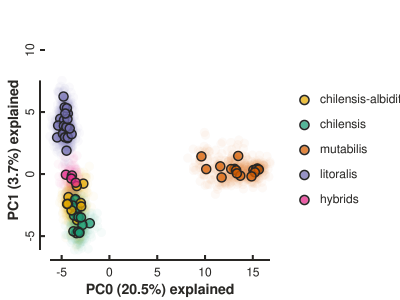

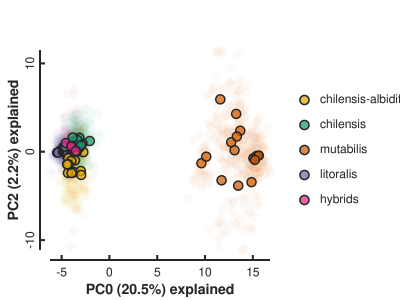

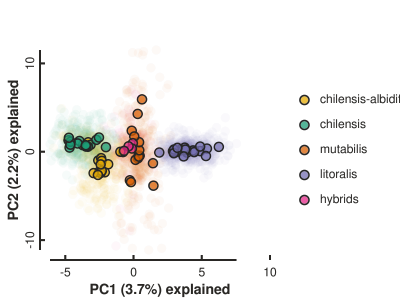

In [350]:
for pair in [(0, 1), (0, 2), (1, 2)]:

    canvas, axes = tool3.draw(pair[0], pair[1], imap=GMAP3, colors=COLORS3, size=9);
    axes.x.ticks.show = True
    axes.y.ticks.show = True
    axes.x.ticks.style['stroke-width'] = 2
    axes.y.ticks.style['stroke-width'] = 2
    #toyplot.html.render(canvas, "../figures/PCA-subh-{}{}.html".format(*pair))
    #toyplot.svg.render(canvas, "../figures/PCA-subh-{}{}.svg".format(*pair))
    #toyplot.pdf.render(canvas, "../figures/PCA-subh-{}{}.pdf".format(*pair))
    display(canvas)

### Exclude mutabilis

In [354]:
DROP = [
    # non-focal taxa and poor quality samples
    '1530',
    '1530x',
    'BV85',
    '1093',
    '1332',
    '1333',
    'BV185',
    'BV152',
    '1288',
    '1290',
    'reference',
    '1351',
    '1352',
    '1353',
    '1541',
    '1594',
    
    # hand-made hybrids
    'HPG1',
    'HPG2',
    'HPG4',
    #'SXM1',
    #'SXM2',
    'SXM3',
    
    # horridocactus clade relatives
    '9366',
    '1488',
    'HV54',
    'HV55',
    'BV190',
    'BV113',
    
    # chilensis that has distant introgressed ancestry
    #'1596',
    #'1597',
    
    # litoralis that has distance introgressed ancestry
    '1075',
    '1083',
]
DROP += GMAP3["mutabilis"]
len(DROP)

44

In [355]:
IMAP4 = {'keep': [i for i in df.accession.tolist() if i not in DROP]}

In [356]:
tool4 = ipa.pca(data=SNPS, imap=IMAP4, mincov=0.90, impute_method="sample")

Samples: 54
Sites before filtering: 1665488
Filtered (indels): 0
Filtered (bi-allel): 81824
Filtered (mincov): 1610726
Filtered (minmap): 55328
Filtered (subsample invariant): 738593
Filtered (minor allele frequency): 0
Filtered (combined): 1633913
Sites after filtering: 24051
Sites containing missing values: 17744 (73.78%)
Missing values in SNP matrix: 51270 (3.95%)
SNPs (total): 24051
SNPs (unlinked): 3357
Imputation: 'sampled'; (0, 1, 2) = 79.9%, 8.2%, 11.9%


In [360]:
tool4.run(25)

Subsampling SNPs: 3357/24051


In [365]:
GMAP4 = {"chilensis-albidiflora": [], "chilensis": [], "litoralis": []}
for name, group in df.groupby('specie'):
    if name in GMAP4:
        for i in group.accession:
            if i in IMAP4['keep']:
                GMAP4[name].append(i)

GMAP4['hybrids'] = ["1596", "1597", "SXM1", "SXM2"]                
#GMAP3

In [368]:
COLORS4 = [
    toytree.darkcolors[5],
    toytree.darkcolors[0],
    #toytree.darkcolors[1],
    toytree.darkcolors[2],
    toytree.darkcolors[3],
    #toytree.darkcolors[7],
]

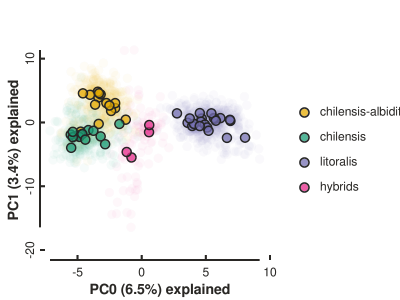

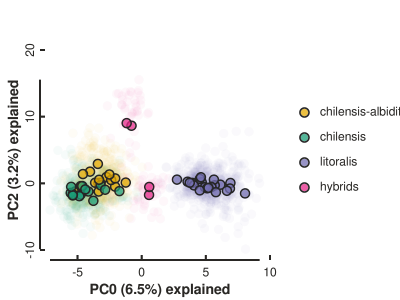

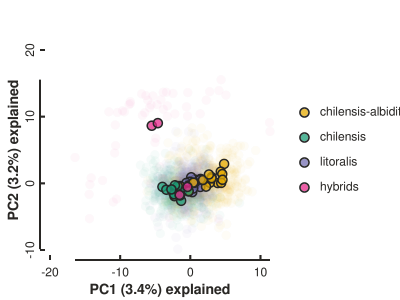

In [370]:
for pair in [(0, 1), (0, 2), (1, 2)]:

    canvas, axes = tool4.draw(pair[0], pair[1], imap=GMAP4, colors=COLORS4, size=9);
    axes.x.ticks.show = True
    axes.y.ticks.show = True
    axes.x.ticks.style['stroke-width'] = 2
    axes.y.ticks.style['stroke-width'] = 2
    toyplot.html.render(canvas, "../figures/PCA-sub-noh-{}{}.html".format(*pair))
    toyplot.svg.render(canvas, "../figures/PCA-sub-noh-{}{}.svg".format(*pair))
    toyplot.pdf.render(canvas, "../figures/PCA-sub-noh-{}{}.pdf".format(*pair))
    display(canvas)

### PCA

In [172]:
# get True litoralis samples
subdf = df.loc[(df.oldname == "subgibbosa") & (df.specie == "litoralis")]
LITO = ["{}-{}".format(*i) for i in zip(subdf.oldname, subdf.accession)]

subdf = df.loc[(df.specie == "chilensis-albidiflora")]
ALBI = ["{}-{}".format(*i) for i in zip(subdf.oldname, subdf.accession)]

subdf = df.loc[df.specie == "chilensis"]
CHIL = ["{}-{}".format(*i) for i in zip(subdf.oldname, subdf.accession)]
CHIL.remove("chilensis-1530")
CHIL.remove("chilensis-1597")

subdf = df.loc[df.specie == "mutabilis"]
MUTA = ["{}-{}".format(*i) for i in zip(subdf.oldname, subdf.accession)]

HYB1 = [
    'Hibridshandmade-HPG1',
    'Hibridshandmade-HPG2',
    'Hibridshandmade-HPG4',
]

HYB2 = [
    "Hibridshandmade-SXM1",
    "Hibridshandmade-SXM2",
]

In [92]:
# label in database is: {oldname}-{accession}
IMAP = {
    "chilensis-alb": ALBI,
    "chilensis": CHIL,
    "litoralis": LITO,
    "mutabilis": MUTA,
}

In [93]:
IMAP

{'chilensis-alb': ['chilensis-1508',
  'chilensis-1509',
  'chilensis-1510',
  'chilensis-1511',
  'chilensis-1512',
  'chilensis-1516',
  'chilensis-1518',
  'chilensis-1521',
  'chilensis-1522',
  'chilensis-1523',
  'chilensis-1524',
  'chilensis-1580',
  'chilensis-1582',
  'chilensis-1583',
  'chilensis-1584',
  'chilensis-1585'],
 'chilensis': ['chilensis-1531',
  'chilensis-1535',
  'chilensis-1540',
  'chilensis-1541',
  'chilensis-1542',
  'chilensis-1545',
  'chilensis-1548',
  'chilensis-1549',
  'chilensis-1550',
  'curvispina-1556',
  'chilensis-1560',
  'chilensis-1562',
  'chilensis-1570',
  'chilensis-1593',
  'chilensis-1594',
  'chilensis-1596'],
 'litoralis': ['subgibbosa-1349',
  'subgibbosa-1350',
  'subgibbosa-1351',
  'subgibbosa-1352',
  'subgibbosa-1353',
  'subgibbosa-1354',
  'subgibbosa-1355',
  'subgibbosa-1356',
  'subgibbosa-1358',
  'subgibbosa-1359',
  'subgibbosa-1362',
  'subgibbosa-1364',
  'subgibbosa-1368',
  'subgibbosa-1369',
  'subgibbosa-1371',

In [96]:
COLORS = [
    toytree.darkcolors[5],
    toytree.darkcolors[0],
    toytree.darkcolors[1],
    toytree.darkcolors[2],
]

In [98]:
tool = ipa.pca(data=SNPS, imap=IMAP, mincov=0.9, impute_method="sample")

Samples: 72
Sites before filtering: 1713200
Filtered (indels): 0
Filtered (bi-allel): 103444
Filtered (mincov): 1679174
Filtered (minmap): 1049753
Filtered (subsample invariant): 525089
Filtered (minor allele frequency): 0
Filtered (combined): 1730371
Sites after filtering: 19893
Sites containing missing values: 18106 (91.02%)
Missing values in SNP matrix: 74325 (5.19%)
SNPs (total): 19893
SNPs (unlinked): 2111
Imputation: 'sampled'; (0, 1, 2) = 85.3%, 6.1%, 8.7%


In [116]:
tool.run(20)
canvas, axes = tool.draw(imap=IMAP, colors=COLORS, size=9);
axes.x.ticks.show = True
axes.y.ticks.show = True
axes.x.ticks.style['stroke-width'] = 2
axes.y.ticks.style['stroke-width'] = 2

toyplot.html.render(canvas, "../figures/PCA-01.html")
toyplot.svg.render(canvas, "../figures/PCA-01.svg")
toyplot.pdf.render(canvas, "../figures/PCA-01.pdf")

Subsampling SNPs: 2111/19893


Subsampling SNPs: 2111/19893


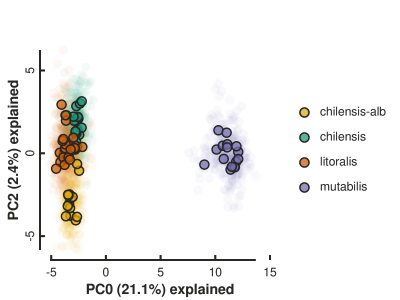

In [117]:
tool.run(20)
canvas, axes = tool.draw(0, 2, imap=IMAP, colors=COLORS, size=9);
axes.x.ticks.show = True
axes.y.ticks.show = True
axes.x.ticks.style['stroke-width'] = 2
axes.y.ticks.style['stroke-width'] = 2
toyplot.html.render(canvas, "../figures/PCA-02.html")
toyplot.svg.render(canvas, "../figures/PCA-02.svg")
toyplot.pdf.render(canvas, "../figures/PCA-02.pdf")
canvas

In [118]:
tool.run(20)
canvas, axes = tool.draw(1, 2, imap=IMAP, colors=COLORS, size=9);
axes.x.ticks.show = True
axes.y.ticks.show = True
axes.x.ticks.style['stroke-width'] = 2
axes.y.ticks.style['stroke-width'] = 2
toyplot.html.render(canvas, "../figures/PCA-12.html")
toyplot.svg.render(canvas, "../figures/PCA-12.svg")
toyplot.pdf.render(canvas, "../figures/PCA-12.pdf")

Subsampling SNPs: 2111/19893


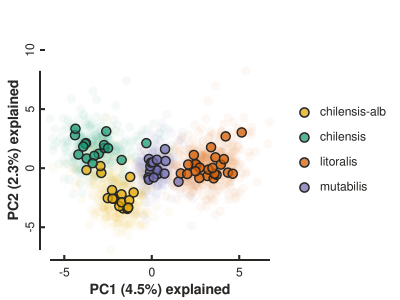

In [119]:
canvas

In [173]:
HYB1, HYB2

(['Hibridshandmade-HPG1', 'Hibridshandmade-HPG2', 'Hibridshandmade-HPG4'],
 ['Hibridshandmade-SXM1', 'Hibridshandmade-SXM2'])

In [175]:
# label in database is: {oldname}-{accession}
IMAP = {
    "chilensis-alb": ALBI,
    "chilensis": CHIL,
    "litoralis": LITO,
    "mutabilis": MUTA,
    "chil x muta": HYB2,
    "chil x lito": HYB1,
}

In [176]:
import itertools
allsamples = {"keep": list(itertools.chain(*IMAP.values()))}

In [177]:
htool = ipa.pca(data=SNPS, imap=allsamples, mincov=0.9, impute_method="sample")

Samples: 77
Sites before filtering: 1713200
Filtered (indels): 0
Filtered (bi-allel): 105925
Filtered (mincov): 1682439
Filtered (minmap): 18356
Filtered (subsample invariant): 500368
Filtered (minor allele frequency): 0
Filtered (combined): 1734648
Sites after filtering: 18766
Sites containing missing values: 16950 (90.32%)
Missing values in SNP matrix: 68389 (4.73%)
SNPs (total): 18766
SNPs (unlinked): 1919
Imputation: 'sampled'; (0, 1, 2) = 85.3%, 6.5%, 8.2%


In [170]:
HCOLORS = COLORS + [toytree.colors[7]] + [toytree.darkcolors[3]]

In [178]:
htool.run()

Subsampling SNPs: 1919/18766


In [187]:
canvas = htool.draw_panels(imap=IMAP, colors=HCOLORS, shapes=["o", "o", "o", "o", "ox", "ox"])
toyplot.html.render(canvas, "../figures/PCA-panel-hybrids.html")
toyplot.pdf.render(canvas, "../figures/PCA-panel-hybrids.pdf")
toyplot.svg.render(canvas, "../figures/PCA-panel-hybrids.svg")

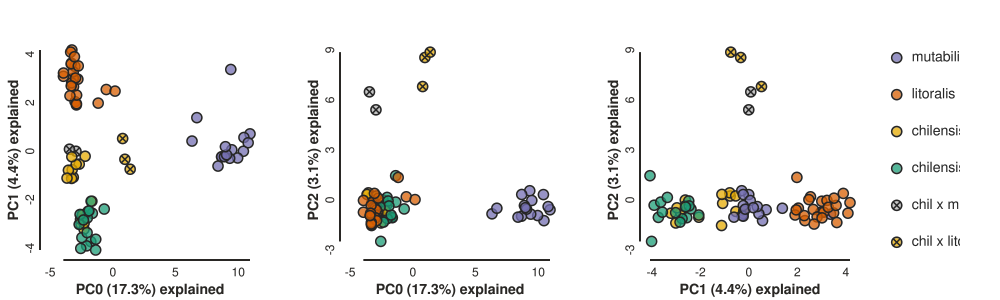

In [188]:
canvas

TypeError: cannot unpack non-iterable Canvas object

In [171]:
#htool.run(5)
canvas, axes = htool.draw(0, 1, imap=IMAP, colors=HCOLORS, shapes=["o", "o", "o", "o", "ox"], size=9);

<svg class="toyplot-canvas-Canvas" height="300.0px" id="t71f3d3ab334e45759bcf0cb2403015a1" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 300.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> Hibridshandmade-HPG1 Hibridshandmade-HPG2 Hibridshandmade-HPG4 Hibridshandmade-SXM1 Hibridshandmade-SXM2 chilensis-1508 chilensis-1509 chilensis-1510 chilensis-1511 chilensis-1512 chilensis-1516 chilensis-1518 chilensis-1521 chilensis-1522 chilensis-1523 chilensis-1524 chilensis-1527 chilensis-1531 chilensis-1535 chilensis-1540 chilensis-1541 chilensis-1542 chilensis-1545 chilensis-1548 chilensis-1549 chilensis-1550 chilensis-1560 chilensis-1562 chilensis-1570 chilensis-1580 chilensis-1582 chilensis-1583 chilensis-1584 chilensis-1585 chilensis-1593 chilensis-1594 chilensis-1596 curvispina-1525 curvispina-1536 curvispina-1538 curvispina-1539 curvispina-1546 curvispina-1547 curvispina-1553 curvispina-1554 curvispina-1556 curvispina-1567 curvispina-1587 curvispina-1588 curvispina-1589 curvispina-1590 curvispina-1591 curvispina-1592 subgibbosa-1349 subgibbosa-1350 subgibbosa-1351 subgibbosa-1352 subgibbosa-1353 subgibbosa-1354 subgibbosa-1355 subgibbosa-1356 subgibbosa-1358 subgibbosa-1359 subgibbosa-1362 subgibbosa-1364 subgibbosa-1368 subgibbosa-1369 subgibbosa-1371 subgibbosa-1372 subgibbosa-1374 subgibbosa-1375 subgibbosa-1377 subgibbosa-1379 subgibbosa-1383 subgibbosa-1384 subgibbosa-1385 subgibbosa-1387 -5 0 5 10 PC0 (17.8%) explained -5 0 5 PC1 (4.1%) explained chilensis-alb chilensis litoralis mutabilis hybrids

In [66]:
# select which samples to include, and put into groups
IMAP = {
    # the mimetic species
    "chilensis": [i for i in info.names if "chilensis" in i],
    
    # non-mimetic relative to mimic
    "subgibbosa": [i for i in info.names if "subgib" in i],
    
    # the model species
    "curvi": [i for i in info.names if "curvi" in i],
    
    # ...
    "litoralis": [i for i in info.names if "litoralis" in i],
    
    # ...
    "hybrid-SXM": [i for i in info.names if "SXM" in i],
    "hybrid-HPG": [i for i in info.names if "HPG" in i],   
}

# IMAP['hybrids-HPG'].remove('Hibridshandmade-HPG2')
IMAP['chilensis'].remove('chilensis-1545')
IMAP['chilensis'].remove('chilensis-1512')
IMAP['chilensis'].remove('chilensis-1594')
IMAP['chilensis'].remove('chilensis-1530')
IMAP['chilensis'].remove('chilensis-1541')
IMAP['chilensis'].remove('chilensis-1527')

IMAP['subgibbosa'].remove('subgibbosa-1353')
IMAP['subgibbosa'].remove('subgibbosa-1352')
IMAP['subgibbosa'].remove('subgibbosa-1351')
IMAP['subgibbosa'].remove('subgibbosa-1290')
IMAP['subgibbosa'].remove('subgibbosa-1288')

MMAP = IMAP.copy()
MMAP['neoporteria'] = IMAP['chilensis'] + IMAP['subgibbosa']
MMAP.pop('chilensis')
MMAP.pop('subgibbosa');

In [67]:
tool = ipa.pca(data=SNPS, imap=MMAP, mincov=0.9, impute_method="sample")

Samples: 74
Sites before filtering: 1713200
Filtered (indels): 0
Filtered (bi-allel): 116607
Filtered (mincov): 1663025
Filtered (minmap): 1570157
Filtered (subsample invariant): 368330
Filtered (combined): 1680979
Sites after filtering: 32221
Sites containing missing values: 24276 (75.34%)
Missing values in SNP matrix: 88965 (3.73%)
Imputation: 'sampled'; (0, 1, 2) = 83.5%, 6.2%, 10.2%


In [74]:
tool.run()
tool.draw(imap=IMAP);

Subsampling SNPs: 3022/32221


<svg class="toyplot-canvas-Canvas" height="300.0px" id="tb595e14a258a4099a80e41b89d55a22d" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 400.0 300.0" width="400.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> Hibridshandmade-HPG1 Hibridshandmade-HPG2 Hibridshandmade-HPG4 Hibridshandmade-SXM1 Hibridshandmade-SXM2 chilensis-1508 chilensis-1509 chilensis-1510 chilensis-1511 chilensis-1516 chilensis-1518 chilensis-1521 chilensis-1522 chilensis-1523 chilensis-1524 chilensis-1531 chilensis-1535 chilensis-1540 chilensis-1542 chilensis-1548 chilensis-1549 chilensis-1550 chilensis-1560 chilensis-1562 chilensis-1570 chilensis-1580 chilensis-1582 chilensis-1583 chilensis-1584 chilensis-1585 chilensis-1593 chilensis-1596 chilensis-1597 curvispina-1525 curvispina-1536 curvispina-1538 curvispina-1539 curvispina-1546 curvispina-1547 curvispina-1553 curvispina-1554 curvispina-1556 curvispina-1567 curvispina-1587 curvispina-1588 curvispina-1589 curvispina-1590 curvispina-1591 curvispina-1592 curvispina-HV54 curvispina-HV55 litoralis-1075 litoralis-1083 subgibbosa-1349 subgibbosa-1350 subgibbosa-1354 subgibbosa-1355 subgibbosa-1356 subgibbosa-1358 subgibbosa-1359 subgibbosa-1362 subgibbosa-1364 subgibbosa-1368 subgibbosa-1369 subgibbosa-1371 subgibbosa-1372 subgibbosa-1374 subgibbosa-1375 subgibbosa-1377 subgibbosa-1379 subgibbosa-1383 subgibbosa-1384 subgibbosa-1385 subgibbosa-1387 -5 0 5 10 15 PC0 (20.8%) explained -5 0 5 10 15 PC1 (4.1%) explained chilensis subgibbosa curvi litoralis hybrid-SXM hybrid-HPG

### Albid PCA

In [164]:
# 
CMAP = IMAP.copy()
CMAP.pop("chilensis");
CMAP["chilensis-alb"] = [i for i in IMAP['chilensis'] if "albid" in str(df[df.name == i].subspecie.iloc[0])]
CMAP["chilensis"] = [i for i in IMAP['chilensis'] if "albid" not in str(df[df.name == i].subspecie.iloc[0])]

In [167]:
mutabilis = [
    'curvispina-1525',
    'curvispina-1536',
    'curvispina-1538',
    'curvispina-1539',
    'curvispina-1546',
    'curvispina-1547',
    'curvispina-1553',
    'curvispina-1554',
    'curvispina-1556',
    'curvispina-1567',
    'curvispina-1587',
    'curvispina-1588',
    'curvispina-1589',
    'curvispina-1590',
    'curvispina-1591',
    'curvispina-1592',
]
CMAP["curvi"] = mutabilis

In [168]:
# hmap only subselects who to include, but has no structure
HMAP = {
    'include': CMAP["chilensis"] + CMAP["chilensis-alb"] + CMAP["subgibbosa"]
}
t = ipa.pca(data=SNPS, imap=HMAP, mincov=0.95, impute_method="sample")

Samples: 49
Sites before filtering: 1713200
Filtered (indels): 0
Filtered (bi-allel): 82767
Filtered (mincov): 1667896
Filtered (minmap): 62851
Filtered (subsample invariant): 784900
Filtered (combined): 1694741
Sites after filtering: 18459
Sites containing missing values: 9516 (51.55%)
Missing values in SNP matrix: 13882 (1.53%)
Imputation: 'sampled'; (0, 1, 2) = 81.0%, 8.6%, 10.4%


In [169]:
t.run(25, subsample=True)

Subsampling SNPs: 2768/18459


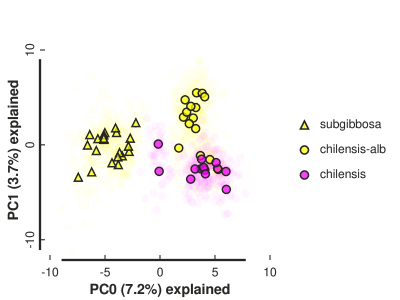

In [188]:
c, a = t.draw(
    imap={i:v for (i,v) in CMAP.items() if i in ['chilensis', 'chilensis-alb', 'subgibbosa']},
    colors=['yellow', 'yellow', 'magenta'],
    shapes=["^", "o", "o"],
    size=8,
);
a.x.ticks.show = True
a.y.ticks.show = True
import toyplot.svg
toyplot.html.render(c, "../figures/PCA-albid.html")
toyplot.svg.render(c, "../figures/PCA-albid.svg")
c

In [39]:
#tool.missing.sort_values(by="missing")[-20:]

### ABBA-BABA

In [48]:
import ipyrad.analysis as ipa

### single scaff analysis

(229, 2)

In [ ]:
# get data mapped to the 1000 largest scaffolds
tmp = ipa.window_extracter("../assembly/Eriosyce-ref_outfiles/Eriosyce-ref.seqs.hdf5")
tt = tmp.scaffold_table.sort_values(by="scaffold_length")
scaffs = tt[tt['scaffold_length'] > 200000].index

# filter data 
wex = ipa.treeslider(
    data="../assembly/Eriosyce-ref_outfiles/Eriosyce-ref.seqs.hdf5",
    name="ref-ts-min200K",
    workdir="../analysis-treeslider",
    scaffold_idxs=scaffs.tolist(),
    mincov=4,
    imap={'include': [i for i in tmp.names if "Hibrid" not in i]},
    rmincov=0.1,
)
wex.ipcluster['cores'] = 40
wex.ipcluster['threads'] = 10
wex.run(auto=True, force=True)

building database: nwindows=229; minsnps=1
[####                ]  20% 1:05:50 | inferring trees 

## MIN40 analysis

In [84]:
# get data mapped to the 1000 largest scaffolds
tmp = ipa.window_extracter("../assembly/Eriosyce-ref_outfiles/Eriosyce-ref.seqs.hdf5")
scaffs = tmp.scaffold_table.sort_values(by="scaffold_length", ascending=False).index[:1000]

In [90]:
# filter data to remove sites with <40 coverage
wex = ipa.window_extracter(
    data="../assembly/Eriosyce-ref_outfiles/Eriosyce-ref.seqs.hdf5",
    name="ref-min40",
    workdir="../analysis-window_extracter",
    scaffold_idxs=scaffs.tolist(),
    mincov=40,
    exclude=[i for i in tmp.names if "Hibrid" in i],
    rmincov=0.5,
)
wex.run()

Wrote data to /pinky/deren/pablo-cacti/analysis-window_extracter/ref-min40.phy


In [92]:
wex.stats

scaffold  start     end   sites   snps  missing  samples
0  concatenated      0  417923  417923  24197    0.388       91

In [91]:
# infer ML tree for min40 dataset
rax = ipa.raxml(
    name="ref-min40",
    data="../analysis-window_extracter/ref-min40.phy",
    workdir="../analysis-raxml", 
    T=40,
    N=100,
)
print(rax.command)
rax.run()

/home/deren/miniconda3/envs/ipy/bin/raxmlHPC-PTHREADS-AVX2 -f a -T 40 -m GTRGAMMA -n ref-min40 -w /pinky/deren/pablo-cacti/analysis-raxml -s /pinky/deren/pablo-cacti/analysis-window_extracter/ref-min40.phy -p 54321 -N 100 -x 12345
job ref-min40 finished successfully


In [ ]:
tre.get_edge_values_mapped

In [107]:
tre = toytree.tree("../analysis-raxml/RAxML_bipartitions.ref-min40")
tre.draw(
    use_edge_lengths=False,
    node_labels="idx",
    width=500,
    edge_colors=tre.get_edge_values_mapped({172, 155, 154})
);

<svg class="toyplot-canvas-Canvas" height="1000.0px" id="teda72d83bb554ae6aab7f31558e702af" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 500.0 1000.0" width="500.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 chilensis-1523 chilensis-1535 chilensis-1560 chilensis-1524 chilensis-1512 chilensis-1550 chilensis-1593 chilensis-1541 chilensis-1542 chilensis-1549 chilensis-1545 chilensis-1548 chilensis-1540 chilensis-1509 chilensis-1508 chilensis-1531 chilensis-1510 chilensis-1518 chilensis-1522 chilensis-1516 chilensis-1582 chilensis-1580 chilensis-1583 chilensis-1585 chilensis-1584 chilensis-1562 chilensis-1511 chilensis-1521 chilensis-1570 chilensis-1594 chilensis-1596 curvispina-1556 subgibbosa-1384 subgibbosa-1385 subgibbosa-1374 subgibbosa-1372 subgibbosa-1371 subgibbosa-1368 subgibbosa-1350 subgibbosa-1369 subgibbosa-1387 subgibbosa-1375 subgibbosa-1377 subgibbosa-1379 subgibbosa-1383 subgibbosa-1351 subgibbosa-1364 subgibbosa-1358 subgibbosa-1359 subgibbosa-1353 subgibbosa-1356 subgibbosa-1362 subgibbosa-1355 subgibbosa-1349 subgibbosa-1352 subgibbosa-1354 castanea-1332 chilensis-1530 castanea-1333 chilensis-1597 senilis-BV185 litoralis-1075 litoralis-1083 clavata-1093 senilis-BV152 curvispina-1553 curvispina-1554 curvispina-1538 curvispina-1547 curvispina-1588 curvispina-1567 clavata-BV85 curvispina-1546 curvispina-1525 curvispina-1589 curvispina-1591 chilensis-1527 curvispina-1536 curvispina-1592 curvispina-1590 curvispina-1587 curvispina-1539 curvispina-HV54 curvispina-HV55 armata-9366 subgibbosa-1290 aspillagae-1488 subgibbosa-1288 marksiana-BV190 aurata-BV113 reference

### Tree without outgroups

In [116]:
tre.write()

'(aurata-BV113:0.0127253,(marksiana-BV190:0.0093945,(subgibbosa-1288:0.00455865,(((aspillagae-1488:0.00447488,(subgibbosa-1290:0.00371977,armata-9366:0.00358623)0:0.000260465)100:0.00107502,((curvispina-HV55:0.00270808,curvispina-HV54:0.00235931)100:0.00221279,(((curvispina-1539:0.00230876,curvispina-1587:0.00303227)26:0.000668137,((curvispina-1590:0.00285915,curvispina-1592:0.00290522)3:0.000365305,(curvispina-1536:0.00306759,(chilensis-1527:0.00234995,curvispina-1591:0.00352517)9:0.000346211)0:0.000430816)4:0.000371746)3:0.000378201,(curvispina-1589:0.00366299,((curvispina-1525:0.00276671,(curvispina-1546:0.00278261,(clavata-BV85:0.00198382,curvispina-1567:0.0014795)100:0.00186271)14:0.000455584)7:0.000372211,(curvispina-1588:0.00336193,((curvispina-1547:0.00282696,curvispina-1538:0.0024958)31:0.00052228,(curvispina-1554:0.00310841,curvispina-1553:0.00286331)49:0.000544176)19:0.000467705)14:0.000465835)8:0.000168237)2:0.000268492)100:0.00130967)77:0.000607123)100:0.000825097,((senili

In [133]:
df['name'] = df["specie"] + "-" + df["accession"]
tmp = df[["name", "Lat", "Long"]]

In [134]:
print(tmp.to_csv(sep=",", index=None))

name,Lat,Long
litoralis-1075,-30.068179999999998,-71.37504
litoralis-1083,-30.06918,-71.37578
clavata-1093,-29.913729999999997,-70.94329
subgibbosa-1288,-36.75741,-73.17634
subgibbosa-1290,-36.75741,-73.17634
castanea-1332,-34.66413,-71.41696999999999
castanea-1333,-34.66415,-71.41696
subgibbosa-1349,-32.15612,-71.52826999999999
subgibbosa-1350,-32.156,-71.52819000000001
subgibbosa-1351,-32.156112,-71.528243
subgibbosa-1352,-32.156797,-71.52834
subgibbosa-1353,-32.156797999999995,-71.528341
subgibbosa-1354,-32.15676,-71.5283
subgibbosa-1355,-32.15676,-71.5283
subgibbosa-1356,-32.15811,-71.53084
subgibbosa-1358,-32.15797,-71.53089
subgibbosa-1359,-32.15793,-71.53089
subgibbosa-1362,-32.15785,-71.53089
subgibbosa-1364,-32.157790000000006,-71.53083000000001
subgibbosa-1368,-32.23813,-71.49688
subgibbosa-1369,-32.238609999999994,-71.49708000000001
subgibbosa-1371,-32.2388,-71.49713
subgibbosa-1372,-32.238820000000004,-71.49713
subgibbosa-1374,-32.23895,-71.49727
subgibbosa-1375,-32.23896,-

In [ ]:
df

In [136]:
tdict = {
    df.name[i]: "{}-{}-{}".format(df['specie'][i], df['subspecie'][i], df['accession'][i])
    for i in df.index                                  
}

In [150]:
tre = toytree.tree("../analysis-raxml/RAxML_bipartitions.ref-min40")
tre = tre.drop_tips(["reference", "aurata-BV113"])

# get expanded tip labels
tips = [tdict[i] for i in tre.get_tip_labels()]
tcolors = ['black' for i in range(len(tips))]
for tidx, tip in enumerate(tips):
    if "curvispina" in tip:
        tcolors[tidx] = toytree.darkcolors[3]
    if "litoralis" in tip:
        tcolors[tidx] = toytree.darkcolors[0]
    if "chilensis" in tip:
        tcolors[tidx] = toytree.darkcolors[1]
    if "subgib" in tip:
        tcolors[tidx] = toytree.darkcolors[2]
        
# draw tree
tre.draw(
    tip_labels=tips,
    tip_labels_colors=tcolors,
    tip_labels_align=True,
    node_labels="support",
    width=500,
    edge_colors=tre.get_edge_values_mapped({171, 154, 153, 161})
);

<svg class="toyplot-canvas-Canvas" height="1000.0px" id="taae6c63a067243cb84c6ebc7c6dbc46d" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" viewBox="0 0 500.0 1000.0" width="500.0px" xmlns="http://www.w3.org/2000/svg" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink"> 9 1 75 0 7 10 0 1 0 34 1 0 19 0 5 93 69 97 7 84 1 0 0 10 0 45 12 33 60 61 0 1 94 0 0 3 3 9 43 0 0 49 31 100 0 0 27 1 16 0 4 19 14 9 9 17 3 0 5 14 7 0 3 7 10 50 8 4 26 15 14 98 2 3 34 91 100 100 0 75 82 77 100 99 100 74 100 chilensis-albidiflora-1523 chilensis-nan-1535 chilensis-nan-1560 chilensis-albidiflora-1524 chilensis-albidiflora-1512 chilensis-nan-1550 chilensis-nan-1593 chilensis-nan-1541 chilensis-nan-1542 chilensis-nan-1549 chilensis-nan-1545 chilensis-nan-1548 chilensis-nan-1540 chilensis-albidiflora-1509 chilensis-albidiflora-1508 chilensis-nan-1531 chilensis-albidiflora-1510 chilensis-albidiflora-1518 chilensis-albidiflora-1522 chilensis-albidiflora-1516 chilensis-albidiflora-1582 chilensis-albidiflora-1580 chilensis-albidiflora-1583 chilensis-albidiflora-1585 chilensis-albidiflora-1584 chilensis-nan-1562 chilensis-albidiflora-1511 chilensis-albidiflora-1521 chilensis-nan-1570 chilensis-nan-1594 chilensis-nan-1596 curvispina-mutabilis-1556 subgibbosa-nan-1384 subgibbosa-nan-1385 subgibbosa-nan-1374 subgibbosa-nan-1372 subgibbosa-nan-1371 subgibbosa-nan-1368 subgibbosa-nan-1350 subgibbosa-nan-1369 subgibbosa-nan-1387 subgibbosa-nan-1375 subgibbosa-nan-1377 subgibbosa-nan-1379 subgibbosa-nan-1383 subgibbosa-nan-1351 subgibbosa-nan-1364 subgibbosa-nan-1358 subgibbosa-nan-1359 subgibbosa-nan-1353 subgibbosa-nan-1356 subgibbosa-nan-1362 subgibbosa-nan-1355 subgibbosa-nan-1349 subgibbosa-nan-1352 subgibbosa-nan-1354 castanea-nan-1332 chilensis-nan-1530 castanea-nan-1333 chilensis-nan-1597 senilis-nan-BV185 litoralis-nan-1075 litoralis-nan-1083 clavata-nan-1093 senilis-nan-BV152 curvispina-mutabilis-1553 curvispina-mutabilis-1554 curvispina-mutabilis-1538 curvispina-mutabilis-1547 curvispina-mutabilis-1588 curvispina-mutabilis-1567 clavata-nan-BV85 curvispina-mutabilis-1546 curvispina-mutabilis-1525 curvispina-mutabilis-1589 curvispina-mutabilis-1591 chilensis-albidiflora-1527 curvispina-mutabilis-1536 curvispina-mutabilis-1592 curvispina-mutabilis-1590 curvispina-mutabilis-1587 curvispina-mutabilis-1539 curvispina-aconcaguensis-HV54 curvispina-aconcaguensis-HV55 armata-nan-9366 subgibbosa-nan-1290 aspillagae-nan-1488 subgibbosa-nan-1288 marksiana-nan-BV190

### TREETOM plot for this tree + geography
[link_to_treetom](...)
